In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored

In [32]:
n_sample = 50
x_train = np.random.normal(0, 1, size=(n_sample, 1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32)

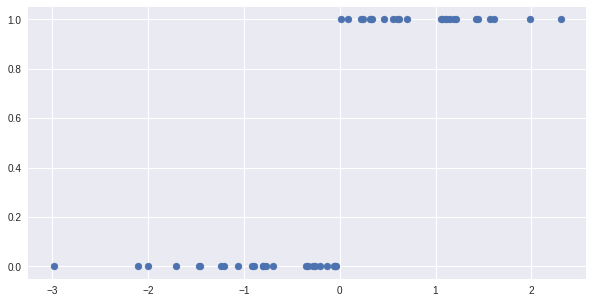

In [33]:
plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=10)

In [34]:
class Classifier(tf.keras.Model):
    def __init__(self):
        super(Classifier, self).__init__()

        self.d1 = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, x):
        predictions = self.d1(x)
        return predictions

In [50]:
EPOCHS = 10
LR = 0.01

model = Classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.SGD(learning_rate=LR)

loss_metric = tf.keras.metrics.Mean()
acc_metric = tf.keras.metrics.CategoricalAccuracy()

In [51]:
for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1))
        y = tf.reshape(y, (1, 1))

        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        loss_metric(loss)    # loss를 차곡차곡 쌓아서, 이후에 평균을 냄 -> 데이터셋 전체에 대한 loss의 평균
        acc_metric(y, predictions)    # 마찬가지로 차곡차곡 쌓아서, 전체 데이터 중 얼마나 맞췄는지를 계산
    
    print(colored('Epoch: ', 'cyan', 'on_white'), epoch + 1)
    template = 'Train loss: {:.4f}\t Train Accuracy: {:.2f}%'

    ds_loss = loss_metric.result()
    ds_acc = acc_metric.result()

    print(template.format(ds_loss, ds_acc*100))

    loss_metric.reset_states()
    acc_metric.reset_states()

Epoch:  1
Train loss: 0.4592	 Train Accuracy: 100.00%
Epoch:  2
Train loss: 0.4295	 Train Accuracy: 100.00%
Epoch:  3
Train loss: 0.4053	 Train Accuracy: 100.00%
Epoch:  4
Train loss: 0.3851	 Train Accuracy: 100.00%
Epoch:  5
Train loss: 0.3680	 Train Accuracy: 100.00%
Epoch:  6
Train loss: 0.3533	 Train Accuracy: 100.00%
Epoch:  7
Train loss: 0.3406	 Train Accuracy: 100.00%
Epoch:  8
Train loss: 0.3293	 Train Accuracy: 100.00%
Epoch:  9
Train loss: 0.3193	 Train Accuracy: 100.00%
Epoch:  10
Train loss: 0.3104	 Train Accuracy: 100.00%


In [52]:
x_min, x_max = x_train.min(), x_train.max()
print(x_min, x_max)

-2.9861753 2.3071523


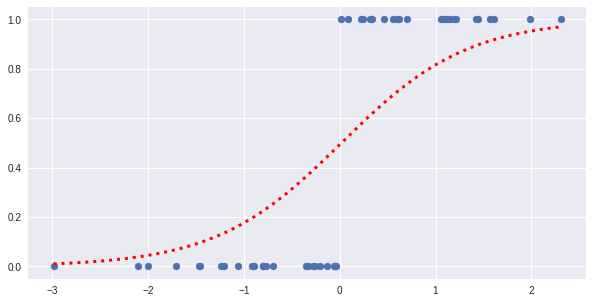

In [56]:
x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1, 1)

x_test_tf = tf.constant(x_test)
y_test_tf = model(x_test_tf)

x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=10)
ax.plot(x_result, y_result,
        'r:', linewidth=3)